# Implementation Practice.1-4
## Forward and Backward Propagation with $y = \theta_{1} x + \theta_{0}$

***
### Dataset Generation
NumPy를 이용하여 다음과 같은 x_data, y_data를 만드시오.

| Data Index | Study Hour | Math Score |
|:-:|:-:|:-:|
|0|1|2|
|1|2|3|
|2|3|4|
|3|4|5|
|4|5|6|

위의 data는 $y = \theta_{1} x + \theta_{0}$로 modeling을 할 수 있다.
이 model에 대한 forward propagation은 다음과 같다.

<img src="./images/1_4_image1.png" width = 1000>

여기서 우리가 학습할 값들은 $\theta_{1}, \theta_{0}$이고 따라서 backward propagation의 대상은 2개이고, Practice1-3까지 $\theta = \theta - \alpha * \frac{\partial J}{\partial \theta}$가 이제 $\theta_{1} = \theta_{1} - \alpha * \frac{\partial J(\theta_{1}, \theta_{0})}{\partial \theta_{1}}, \theta_{0} = \theta_{0} - \alpha * \frac{\partial J(\theta_{1}, \theta_{0})}{\partial \theta_{0}}$로 2개가 된다.

이제 이 dataset을 numpy를 이용하여 만들어보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Your Code #####
x_data = np.arange(5)
y_data = np.arange(5) + 1
##### Your Code #####

print(x_data, y_data)
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x_data, y_data, 'bo')

[0 1 2 3 4] [1 2 3 4 5]


**Expected Output:**

[0 1 2 3 4] [1 2 3 4 5]
<img src="./images/1_4_image2.png" width = 300>

***
### Node Implementation
Bias가 추가된 model에서는 Practice1-3까지 사용했던 node들로 충분하다.
따라서 전에 만들었던 node들을 불러오자.

In [15]:
'''
Load The Previous Nodes
    1. plus_node()
    2. minus_node()
    3. mul_node()
    4. square_node()
    5. cost_node()
'''
class PlusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x + y
        return self.z
    def backward(self, dL):
        return 1*dL, 1*dL

class MinusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x - y
        return self.z
    
    def backward(self, dL):
        return dL, -1*dL

class MulNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    def backward(self, dL):
        return self.y*dL, self.x*dL

class SquareNode():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x, self.z = x, x *x
        return self.z
    
    def backward(self, dL):
        return 2*self.x * dL
    
class CostNode():
    def __init__(self):
        self.x, self.z = None, None
        self.length = None
        
    def forward(self, x):
        self.length = len(x)
        self.x = x
        self.z = np.mean(self.x)
        return self.z
        
    def backward(self):
        return np.array([(1 / self.length)] * self.length)

이 model에 대하여 Batch Gradient Descent Method를 적용한 사진은 다음과 같다.

<img src="./images/1_4_image4.png" width = 1000>

Numpy를 이용하여 위 model의 forward propagation, backward propagation을 구현하고
실제 학습을 진행해보자.

In [16]:
##### Your Code(Model Implmenataion) #####
class MyModel:
    def __init__(self, z1_node, z2_node, z3_node, L_node, cost_node, theta1, theta0, lr):
        self.z1_node = z1_node
        self.z2_node = z2_node
        self.z3_node = z3_node
        self.L_node = L_node
        self.c_node = cost_node
        self.theta1 = theta1
        self.theta0 = theta0
        self.lr = lr
        
    def forward(self, x_data, y_data):
        z1 = self.z1_node.forward(self.theta1, x_data)
        z2 = self.z2_node.forward(z1, self.theta0)
        z3 = self.z3_node.forward(y_data, z2)
        Loss = self.L_node.forward(z3)
        cost = self.c_node.forward(Loss)
        return cost
        
    def backward(self):
        dLoss = self.c_node.backward()
        dz3 = self.L_node.backward(dLoss)
        dy, dz2 = self.z3_node.backward(dz3)
        dz1, dTheta0 = self.z2_node.backward(dz2)
        dTheta1, dx = self.z1_node.backward(dz1) 
        self.theta1 -= self.lr * np.sum(dTheta1)
        self.theta0 -= self.lr * np.sum(dTheta0)
        return self.theta1, self.theta0
##### Your Code(Model Implmenataion) ##### 

In [17]:
theta1, theta0 = 0, 0
lr = 0.01
epochs = 1000

model = MyModel(z1_node=MulNode(), 
                z2_node=PlusNode(), 
                z3_node=MinusNode(), 
                L_node=SquareNode(),
                cost_node=CostNode(),
                theta1=theta1, 
                theta0=theta0, 
                lr=lr)

cost_list = []
theta1_list, theta0_list = [], []

for epoch in range(epochs):
    cost = model.forward(x_data, y_data)
    theta1, theta0 = model.backward()

    cost_list.append(cost)
    theta1_list.append(theta1)
    theta0_list.append(theta0)
    if epoch % 100 == 0: print('Cost: {0:7.3f}\t theta1:{1:7.3f}\t theta0:{2:7.3f}'.format(cost, theta1, theta0))
    ##### Parameter Update #####

Cost:  11.000	 theta1:  0.160	 theta0:  0.060
Cost:   0.034	 theta1:  1.111	 theta0:  0.684
Cost:   0.010	 theta1:  1.061	 theta0:  0.826
Cost:   0.003	 theta1:  1.033	 theta0:  0.905
Cost:   0.001	 theta1:  1.018	 theta0:  0.948
Cost:   0.000	 theta1:  1.010	 theta0:  0.971
Cost:   0.000	 theta1:  1.006	 theta0:  0.984
Cost:   0.000	 theta1:  1.003	 theta0:  0.991
Cost:   0.000	 theta1:  1.002	 theta0:  0.995
Cost:   0.000	 theta1:  1.001	 theta0:  0.997


**Expected Output:** <br>
Cost:  11.000	 theta1:  0.160	 theta0:  0.060 <br>
Cost:   0.034	 theta1:  1.111	 theta0:  0.684  <br>
Cost:   0.010	 theta1:  1.061	 theta0:  0.826 <br>
Cost:   0.003	 theta1:  1.033	 theta0:  0.905 <br>
Cost:   0.001	 theta1:  1.018	 theta0:  0.948 <br>
Cost:   0.000	 theta1:  1.010	 theta0:  0.971 <br>
Cost:   0.000	 theta1:  1.006	 theta0:  0.984 <br>
Cost:   0.000	 theta1:  1.003	 theta0:  0.991 <br>
Cost:   0.000	 theta1:  1.002	 theta0:  0.995 <br>
Cost:   0.000	 theta1:  1.001	 theta0:  0.997 <br>

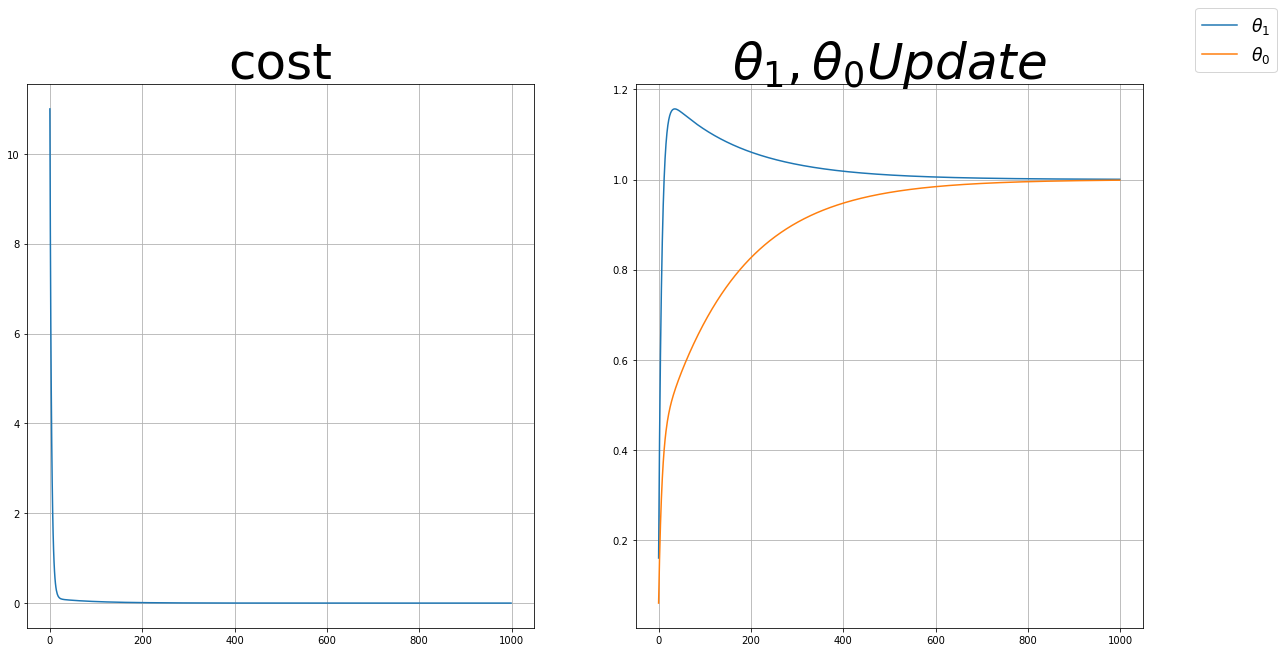

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.grid()
ax1.plot(cost_list)
ax1.set_title("cost", fontsize = 50)

#fig, ax1 = plt.subplots(figsize = (10,10))
ax2.plot(theta1_list, label = r"$\theta_{1}$")
ax2.plot(theta0_list, label = r"$\theta_{0}$")
fig.legend(fontsize = 'xx-large')
ax2.set_title(r"$\theta_{1}, \theta_{0} Update$", fontsize = 50)
ax2.grid()

**Expected Output:**

<img src="./images/1_4_image3.png" width = 1000>